### Importing the needed Python libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing the tables from the Excel workbook

In [2]:
movies_table = pd.read_excel(r'C:\Users\Stejl\Downloads\movies-db-1.xlsx',sheet_name='movies')

In [3]:
financials_table = pd.read_excel(r'C:\Users\Stejl\Downloads\movies-db-1.xlsx',sheet_name='financials')

In [4]:
actors_table =  pd.read_excel(r'C:\Users\Stejl\Downloads\movies-db-1.xlsx',sheet_name='actors')
movie_actor_table= pd.read_excel(r'C:\Users\Stejl\Downloads\movies-db-1.xlsx',sheet_name='movie_actor')
languages_table =  pd.read_excel(r'C:\Users\Stejl\Downloads\movies-db-1.xlsx',sheet_name='languages')

### Cleaning the data tables

--- Movies_table

In [5]:
movies_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      39 non-null     int64  
 1   title         39 non-null     object 
 2   industry      39 non-null     object 
 3   release_year  39 non-null     int64  
 4   imdb_rating   38 non-null     float64
 5   studio        36 non-null     object 
 6   language_id   39 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.3+ KB


In [6]:
### Checking how many nulls or Na are there

In [7]:
movies_table.isna().sum() ## We can see that there are 3 Na values in studio column and 1 in imdb_rating column

movie_id        0
title           0
industry        0
release_year    0
imdb_rating     1
studio          3
language_id     0
dtype: int64

In [8]:
movies_table[(movies_table['imdb_rating'].isna()) | (movies_table['studio'].isna())] ## Located Na values in the movies_table

,movie_id,title,industry,release_year,imdb_rating,studio,language_id
9,110,Bajirao Mastani,Bollywood,2015,7.2,NaN,1
22,124,Parasite,Hollywood,2019,8.5,NaN,5
26,128,Taare Zameen Par,Bollywood,2007,8.3,NaN,1
29,131,Sanju,Bollywood,2018,NaN,Vinod Chopra Films,1


In [9]:
movies_table['studio']=movies_table['studio'].fillna('Unknown') ## Filling the Na values in studio column with "Unknown" word

In [10]:
movies_table.shape

(39, 7)

In [11]:
movies_table.nunique() ## As we can see, the movie_id and the title columns should consist only unique values and that's the case

movie_id        39
title           39
industry         2
release_year    25
imdb_rating     20
studio          23
language_id      5
dtype: int64

In [12]:
movies_table.isna().sum()

movie_id        0
title           0
industry        0
release_year    0
imdb_rating     1
studio          0
language_id     0
dtype: int64

In [13]:
movies_table.isnull().sum()

movie_id        0
title           0
industry        0
release_year    0
imdb_rating     1
studio          0
language_id     0
dtype: int64

In [14]:
## As we can see, there is only one left Na and null value in this table but we will leave it like that fir better analysis

### Financials table cleaning

In [15]:
financials_table.head() ## printing the first five rows of the table to see how it look

,movie_id,budget,revenue,unit,currency
0,101,1.0,12.5,Billions,INR
1,102,200.0,954.8,Millions,USD
2,103,165.0,644.8,Millions,USD
3,104,180.0,854.0,Millions,USD
4,105,250.0,670.0,Millions,USD


In [16]:
print(financials_table.isna().sum())
print(financials_table.isnull().sum()) ## Seeing if there are any Na or null values in the dataset

movie_id    0
budget      0
revenue     0
unit        0
currency    0
dtype: int64
movie_id    0
budget      0
revenue     0
unit        0
currency    0
dtype: int64


In [17]:
print(financials_table.shape)
print(financials_table.info()) ## Printing the shape of the table (40 rows, 5 columns) and basic info for the dataset

(40, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   movie_id  40 non-null     int64  
 1   budget    40 non-null     float64
 2   revenue   40 non-null     float64
 3   unit      40 non-null     object 
 4   currency  40 non-null     object 
dtypes: float64(2), int64(1), object(2)
memory usage: 1.7+ KB
None


In [18]:
financials_table.loc[financials_table['unit']=='Billions','budget']=financials_table['budget']*1000/82

In [19]:
financials_table.loc[financials_table['unit']=='Billions','revenue']=financials_table['revenue']*1000/82

In [20]:
financials_table['unit'] = financials_table['unit'].replace('Billions','Millions')

In [21]:
financials_table.loc[financials_table['unit']=='Thousands','budget']=financials_table['budget']/1000/82
financials_table.loc[financials_table['unit']=='Thousands','revenue']=financials_table['revenue']/1000/82


In [22]:
financials_table.loc[financials_table['movie_id']==107,'budget']=financials_table['budget']/82
financials_table.loc[financials_table['movie_id']==108,'budget']=financials_table['budget']/82
financials_table.loc[financials_table['movie_id']==109,'budget']=financials_table['budget']/82
financials_table.loc[financials_table['movie_id']==128,'budget']=financials_table['budget']/82
financials_table.loc[financials_table['movie_id']==129,'budget']=financials_table['budget']/82
financials_table.loc[financials_table['movie_id']==130,'budget']=financials_table['budget']/82
financials_table.loc[financials_table['movie_id']==135,'budget']=financials_table['budget']/82
financials_table.loc[financials_table['movie_id']==136,'budget']=financials_table['budget']/82
financials_table.loc[financials_table['movie_id']==107,'revenue']=financials_table['revenue']/82
financials_table.loc[financials_table['movie_id']==108,'revenue']=financials_table['revenue']/82
financials_table.loc[financials_table['movie_id']==109,'revenue']=financials_table['revenue']/82
financials_table.loc[financials_table['movie_id']==128,'revenue']=financials_table['revenue']/82
financials_table.loc[financials_table['movie_id']==129,'revenue']=financials_table['revenue']/82
financials_table.loc[financials_table['movie_id']==130,'revenue']=financials_table['revenue']/82
financials_table.loc[financials_table['movie_id']==135,'revenue']=financials_table['revenue']/82
financials_table.loc[financials_table['movie_id']==136,'revenue']=financials_table['revenue']/82

In [23]:
financials_table['currency'] = financials_table['currency'].replace('INR','USD')

In [24]:
financials_table['unit'] = financials_table['unit'].replace('Thousands','Millions')

In [25]:
financials_table['profit']=financials_table['revenue']-financials_table['budget']
financials_table=financials_table.round(2)

In [26]:
financials_table ## Cleaned financials_table and ready for further analysis

,movie_id,budget,revenue,unit,currency,profit
0,101,12.20,152.44,Millions,USD,140.24
1,102,200.00,954.80,Millions,USD,754.80
2,103,165.00,644.80,Millions,USD,479.80
3,104,180.00,854.00,Millions,USD,674.00
4,105,250.00,670.00,Millions,USD,420.00
5,107,4.88,24.39,Millions,USD,19.51
6,108,6.71,48.78,Millions,USD,42.07
7,109,4.76,16.59,Millions,USD,11.83
8,110,17.07,42.68,Millions,USD,25.61
9,111,25.00,73.30,Millions,USD,48.30


## Cleaning the actors table

In [27]:
actors_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   actor_id    67 non-null     int64 
 1   name        67 non-null     object
 2   birth_year  67 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.7+ KB


In [28]:
print(actors_table.shape)
print(actors_table.isna().sum())
print(actors_table.isnull().sum()) ## There are no NA or null values in actors_table dataset

(67, 3)
actor_id      0
name          0
birth_year    0
dtype: int64
actor_id      0
name          0
birth_year    0
dtype: int64


In [29]:
actors_table.nunique() # Unique values for all the columns

actor_id      67
name          67
birth_year    41
dtype: int64

In [30]:
print(actors_table['birth_year'].value_counts())
print(actors_table.loc[actors_table['birth_year'].duplicated()].sort_values('birth_year',ascending = False))

1982    5
1974    5
1965    4
1981    3
1967    3
1979    3
1985    3
1986    3
1983    2
1984    2
1976    2
1975    2
1959    2
1943    1
1947    1
1905    1
1919    1
1988    1
1997    1
1929    1
1940    1
1950    1
1955    1
1946    1
1956    1
1952    1
1964    1
1924    1
1978    1
1921    1
1908    1
1972    1
1968    1
1969    1
1937    1
1958    1
1970    1
1948    1
1942    1
1989    1
1991    1
Name: birth_year, dtype: int64
    actor_id                 name  birth_year
16        66     Deepika Padukone        1986
24        74     Robert Pattinson        1986
65       169    Sidharth Malhotra        1985
55       159           Ram Charan        1985
57       161       Rana Daggubati        1984
54       158   N. T. Rama Rao Jr.        1983
63       167       Sebastian Stan        1982
53       157        Fahadh Faasil        1982
52       156           Allu Arjun        1982
51       155        Ranbir Kapoor        1982
45        95          Chris Evans        1981
6      

## movie_actor_table

#### This is the table that consists the movie_id and actor_id and is used as a connector between some of the columns

In [31]:
movie_actor_table.nunique()# We don't need to make changes to this table because it's only a connector between some of the other tables

movie_id    40
actor_id    67
dtype: int64

## Languages table

In [32]:
languages_table # We'll need this table for analysis 

,language_id,name
0,1,Hindi
1,2,Telugu
2,3,Kannada
3,4,Tamil
4,5,English
5,6,French
6,7,Bengali
7,8,Gujarati


In [33]:
movies_table

,movie_id,title,industry,release_year,imdb_rating,studio,language_id
0,101,K.G.F: Chapter 2,Bollywood,2022,8.4,Hombale Films,3
1,102,Doctor Strange in the Multiverse of Madness,Hollywood,2022,7.0,Marvel Studios,5
2,103,Thor: The Dark World,Hollywood,2013,6.8,Marvel Studios,5
3,104,Thor: Ragnarok,Hollywood,2017,7.9,Marvel Studios,5
4,105,Thor: Love and Thunder,Hollywood,2022,6.8,Marvel Studios,5
5,106,Sholay,Bollywood,1975,8.1,United Producers,1
6,107,Dilwale Dulhania Le Jayenge,Bollywood,1995,8.0,Yash Raj Films,1
7,108,3 Idiots,Bollywood,2009,8.4,Vinod Chopra Films,1
8,109,Kabhi Khushi Kabhie Gham,Bollywood,2001,7.4,Dharma Productions,1
9,110,Bajirao Mastani,Bollywood,2015,7.2,Unknown,1


### Q1. How many of the movies are filmed in Bollywood?

In [34]:
Bollywood_movies = movies_table.loc[movies_table['industry']=='Bollywood']

In [35]:
Bollywood_movies
print(Bollywood_movies.title.count()) # Number of movies that were filmed in Bollywood is 18.

18


### Q2. Print all the Hollywood movies that are  released between 2015 and 2022 with imdb_rating above 8.0

In [36]:
movies_table.head()

,movie_id,title,industry,release_year,imdb_rating,studio,language_id
0,101,K.G.F: Chapter 2,Bollywood,2022,8.4,Hombale Films,3
1,102,Doctor Strange in the Multiverse of Madness,Hollywood,2022,7.0,Marvel Studios,5
2,103,Thor: The Dark World,Hollywood,2013,6.8,Marvel Studios,5
3,104,Thor: Ragnarok,Hollywood,2017,7.9,Marvel Studios,5
4,105,Thor: Love and Thunder,Hollywood,2022,6.8,Marvel Studios,5


In [37]:
Hollywood_movies_between_2015_2022 = movies_table.loc[(movies_table['industry']=='Hollywood') & (movies_table['release_year'].between(2015,2022) & (movies_table['imdb_rating']>=8.0))] 

In [38]:
Hollywood_movies_between_2015_2022 # We found the Hollywood movies that were released between 2015 and 2022 with imdb_rating equal to or above 8.0.

,movie_id,title,industry,release_year,imdb_rating,studio,language_id
22,124,Parasite,Hollywood,2019,8.5,Unknown,5
23,125,Avengers: Endgame,Hollywood,2019,8.4,Marvel Studios,5
24,126,Avengers: Infinity War,Hollywood,2018,8.4,Marvel Studios,5


### Q3. Find the top 5 studios movies based on the highest profit

In [39]:
movies_table.head()

,movie_id,title,industry,release_year,imdb_rating,studio,language_id
0,101,K.G.F: Chapter 2,Bollywood,2022,8.4,Hombale Films,3
1,102,Doctor Strange in the Multiverse of Madness,Hollywood,2022,7.0,Marvel Studios,5
2,103,Thor: The Dark World,Hollywood,2013,6.8,Marvel Studios,5
3,104,Thor: Ragnarok,Hollywood,2017,7.9,Marvel Studios,5
4,105,Thor: Love and Thunder,Hollywood,2022,6.8,Marvel Studios,5


In [40]:
financials_table.head()

,movie_id,budget,revenue,unit,currency,profit
0,101,12.2,152.44,Millions,USD,140.24
1,102,200.0,954.80,Millions,USD,754.80
2,103,165.0,644.80,Millions,USD,479.80
3,104,180.0,854.00,Millions,USD,674.00
4,105,250.0,670.00,Millions,USD,420.00


In [41]:
## First, we need to merge the two tables
movies_financials = movies_table.merge(financials_table, on='movie_id')

In [42]:
## Then, we can use group by to find the top 5 studios with the highest profits in Millions USD
movies_financials.groupby('studio')['profit'].sum().reset_index().nlargest(5,'profit')

,studio,profit
9,Marvel Studios,7065.9
0,20th Century Fox,2610.0
11,Paramount Pictures,2285.8
14,Universal Pictures,1283.2
13,Syncopy,821.0


### Q4.Calculate the total revenue of Warner Bros studio up to date

In [43]:
total_revenues = movies_financials.groupby(['studio','currency','unit'])['revenue'].sum().reset_index()

In [44]:
total_revenues.loc[total_revenues['studio'].str.contains('Warner Bros')] # This was the total revenue of Warner Bros 

,studio,currency,unit,revenue
19,Warner Bros. Pictures,USD,Millions,701.8


### Q5. Find the number of movies per non-English language

In [45]:
movie_language = movies_table.merge(languages_table,how = 'left',on ='language_id')

In [46]:
non_english_movies = movie_language.loc[movie_language['name']!='English'] # Non-English languages

In [47]:
non_english_movies.groupby('name')['title'].count().reset_index() # Number of movies per non-English language

,name,title
0,Bengali,1
1,Hindi,13
2,Kannada,1
3,Telugu,3


### Q6.Total profit of non-English speaking movies per language

In [48]:
movies_data = movies_financials.merge(languages_table, on='language_id') # Joining the tables so we can finds and analyze the needed data

In [49]:
movies_data

,movie_id,title,industry,release_year,imdb_rating,studio,language_id,budget,revenue,unit,currency,profit,name
0,101,K.G.F: Chapter 2,Bollywood,2022,8.4,Hombale Films,3,12.20,152.44,Millions,USD,140.24,Kannada
1,102,Doctor Strange in the Multiverse of Madness,Hollywood,2022,7.0,Marvel Studios,5,200.00,954.80,Millions,USD,754.80,English
2,103,Thor: The Dark World,Hollywood,2013,6.8,Marvel Studios,5,165.00,644.80,Millions,USD,479.80,English
3,104,Thor: Ragnarok,Hollywood,2017,7.9,Marvel Studios,5,180.00,854.00,Millions,USD,674.00,English
4,105,Thor: Love and Thunder,Hollywood,2022,6.8,Marvel Studios,5,250.00,670.00,Millions,USD,420.00,English
5,111,The Shawshank Redemption,Hollywood,1994,9.3,Castle Rock Entertainment,5,25.00,73.30,Millions,USD,48.30,English
6,113,Interstellar,Hollywood,2014,8.6,Warner Bros. Pictures,5,165.00,701.80,Millions,USD,536.80,English
7,115,The Pursuit of Happyness,Hollywood,2006,8.0,Columbia Pictures,5,55.00,307.10,Millions,USD,252.10,English
8,116,Gladiator,Hollywood,2000,8.5,Universal Pictures,5,103.00,460.50,Millions,USD,357.50,English
9,117,Titanic,Hollywood,1997,7.9,Paramount Pictures,5,200.00,2202.00,Millions,USD,2002.00,English


In [50]:
movies_profit_per_non_english_speaking_language = movies_data.loc[movies_data['name']!='English'].groupby(['name','unit','currency'])['profit'].sum().reset_index().sort_values('profit',ascending = False) # Non - english speaking movies

In [51]:
movies_profit_per_non_english_speaking_language

,name,unit,currency,profit
1,Hindi,Millions,USD,907.30
3,Telugu,Millions,USD,156.10
2,Kannada,Millions,USD,140.24
0,Bengali,Millions,USD,0.37


### Q7.Find all the actors who are born in 1980 and played a role in 2 or more movies 

In [52]:
# First we need to join actors_table and movie_actor table because movie_actor_table is the only table that consists movie_id and actor_id
actors = movie_actor_table.merge(actors_table, on='actor_id')
actors

,movie_id,actor_id,name,birth_year
0,101,50,Yash,1986
1,101,51,Sanjay Dutt,1959
2,129,51,Sanjay Dutt,1959
3,102,52,Benedict Cumberbatch,1976
4,102,53,Elizabeth Olsen,1989
...,...,...,...,...
80,137,166,Tommy Lee Jones,1946
81,138,167,Sebastian Stan,1982
82,139,168,Anil Kapoor,1956
83,140,169,Sidharth Malhotra,1985


In [53]:
# After we do that, we need to merge actors and movies_data tables and in that way we can have all the data available
pd.set_option('display.max_rows',100)
full_movies_data = movies_data.merge(actors, on='movie_id')
full_movies_data


,movie_id,title,industry,release_year,imdb_rating,studio,language_id,budget,revenue,unit,currency,profit,name_x,actor_id,name_y,birth_year
0,101,K.G.F: Chapter 2,Bollywood,2022,8.4,Hombale Films,3,12.20,152.44,Millions,USD,140.24,Kannada,50,Yash,1986
1,101,K.G.F: Chapter 2,Bollywood,2022,8.4,Hombale Films,3,12.20,152.44,Millions,USD,140.24,Kannada,51,Sanjay Dutt,1959
2,102,Doctor Strange in the Multiverse of Madness,Hollywood,2022,7.0,Marvel Studios,5,200.00,954.80,Millions,USD,754.80,English,52,Benedict Cumberbatch,1976
3,102,Doctor Strange in the Multiverse of Madness,Hollywood,2022,7.0,Marvel Studios,5,200.00,954.80,Millions,USD,754.80,English,53,Elizabeth Olsen,1989
4,103,Thor: The Dark World,Hollywood,2013,6.8,Marvel Studios,5,165.00,644.80,Millions,USD,479.80,English,54,Chris Hemsworth,1983
5,103,Thor: The Dark World,Hollywood,2013,6.8,Marvel Studios,5,165.00,644.80,Millions,USD,479.80,English,55,Natalie Portman,1981
6,103,Thor: The Dark World,Hollywood,2013,6.8,Marvel Studios,5,165.00,644.80,Millions,USD,479.80,English,56,Tom Hiddleston,1981
7,104,Thor: Ragnarok,Hollywood,2017,7.9,Marvel Studios,5,180.00,854.00,Millions,USD,674.00,English,54,Chris Hemsworth,1983
8,104,Thor: Ragnarok,Hollywood,2017,7.9,Marvel Studios,5,180.00,854.00,Millions,USD,674.00,English,56,Tom Hiddleston,1981
9,105,Thor: Love and Thunder,Hollywood,2022,6.8,Marvel Studios,5,250.00,670.00,Millions,USD,420.00,English,54,Chris Hemsworth,1983


In [54]:
full_movies_data.rename(columns={'language':'movie_language','name_y':'actors_name'},inplace = True)


In [55]:
 actors_born_after_1980= full_movies_data.loc[full_movies_data['birth_year']>=1980].groupby(['actors_name','birth_year'])['title'].count().reset_index()

In [56]:
actors_born_after_1980_more_than_1_movie=actors_born_after_1980.loc[actors_born_after_1980['title']>=2] # Actors who were born in 1980 or after that and played in two or more movies

In [57]:
actors_born_after_1980_more_than_1_movie

,actors_name,birth_year,title
2,Anushka Sharma,1988,2
3,Chris Evans,1981,4
4,Chris Hemsworth,1983,5
11,Natalie Portman,1981,2
18,Tom Hiddleston,1981,2


### Q8.Find the movie with highest profit, movie with maximum revenue, movie with minimum revenue and average imdb_rating of the movies in which Chris Hemsworth and Chris Evans played 

In [58]:
movies_with_Chris_Hemsworth_Chris_Evans = full_movies_data.loc[full_movies_data['actors_name'].isin(['Chris Evans','Chris Hemsworth'])]

In [59]:
movies_with_Chris_Hemsworth_Chris_Evans.groupby(['title','release_year','unit','currency']).agg({'profit':'unique'}).reset_index().sort_values('profit',ascending = False) # Avengers:Endgame has the highest profit of all movies where Chris Hemsworth and Chris Evans played a role (first part of the assignment)

,title,release_year,unit,currency,profit
0,Avengers: Endgame,2019,Millions,USD,[2398.0]
1,Avengers: Infinity War,2018,Millions,USD,[1648.0]
5,Thor: Ragnarok,2017,Millions,USD,[674.0]
3,Captain America: The Winter Soldier,2014,Millions,USD,[537.4]
6,Thor: The Dark World,2013,Millions,USD,[479.8]
4,Thor: Love and Thunder,2022,Millions,USD,[420.0]
2,Captain America: The First Avenger,2011,Millions,USD,[153.9]


In [60]:
movies_with_Chris_Hemsworth_Chris_Evans.groupby(['actors_name','unit','currency']).agg({'revenue':['min','max']}).reset_index() # These are the min and maximum revenues  based on movies where Chris Evans and Chris Hemswort played a role.(Second part of the assighnment)

actors_name      unit currency revenue        
                                          min     max
0      Chris Evans  Millions      USD   370.6  2798.0
1  Chris Hemsworth  Millions      USD   644.8  2798.0

In [61]:
avg_imdbrating = movies_with_Chris_Hemsworth_Chris_Evans.groupby('actors_name')['imdb_rating'].mean().reset_index()

In [62]:
avg_imdbrating = avg_imdbrating.round(1)
avg_imdbrating # Average imdb_rating of the Chris Evans and Chris Hemsworth movies

,actors_name,imdb_rating
0,Chris Evans,7.9
1,Chris Hemsworth,7.7


### Data Visualization

In [63]:
English_speaking_movies = full_movies_data.loc[full_movies_data['studio']=='Marvel Studios']

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Total profit in millions USD '),
 Text(0.5, 1.0, 'Marvel Studios total profit across the years')]

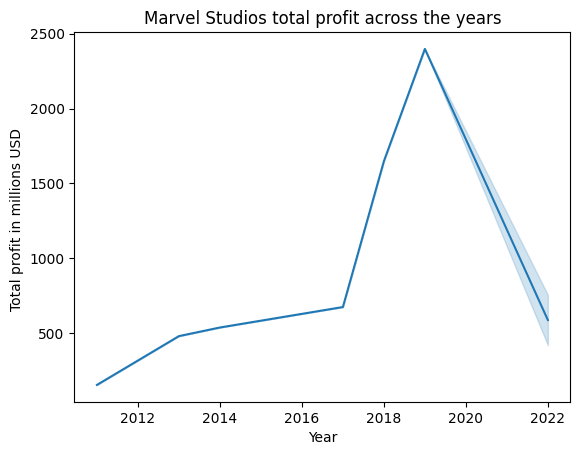

In [64]:
sns.lineplot(data=English_speaking_movies,x='release_year',y='profit').set(xlabel='Year',ylabel='Total profit in millions USD ',title='Marvel Studios total profit across the years')

### Visualization 2 - Top 5 studios on pie chart based the % of the revenues

In [65]:
top_5_revenues = full_movies_data.groupby('studio')['revenue'].sum().reset_index().nlargest(5,'revenue')

Text(0.5, 1.0, 'Top 5 studios based on the % of the total revenue ')

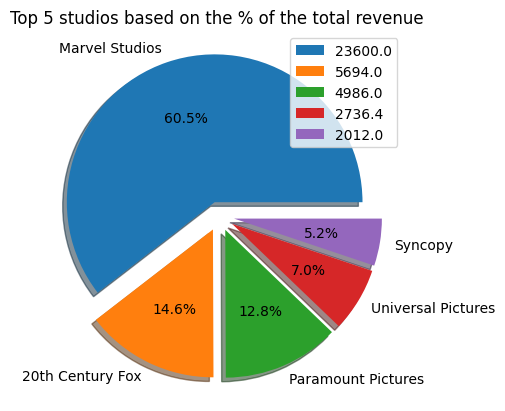

In [66]:
plt.pie(x=top_5_revenues['revenue'],labels=top_5_revenues['studio'],shadow = True,autopct='%1.1f%%',explode = (0.1,0.1, 0.1, 0.1, 0.1))
plt.legend(top_5_revenues['revenue'])
plt.title('Top 5 studios based on the % of the total revenue ')


### Exporting the dataframe fo cleaned csv file 

In [67]:
full_movies_data.to_csv('C:\\Users\\Stejl\\Desktop\\CV Projects\\cleaned_movies_db.csv')## This is the csv version of the cleaned data in Excel

In [68]:
full_movies_data.to_excel('C:\\Users\\Stejl\\Desktop\\CV Projects\\cleaned_movies_db.xlsx') ## This is the xlsx version of the cleaned data in Excel